In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motionsense-dataset/data_subjects_info.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/dws_1/._sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_4.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_5.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/wlk_7/._sub_13.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_16.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_18.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_3.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_12.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_4

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/motionsense-dataset/data_subjects_info.csv')
df.head()

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0


In [5]:
df.columns

Index(['code', 'weight', 'height', 'age', 'gender'], dtype='object')

In [6]:
print("Shape:", df.shape)

Shape: (24, 5)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   code    24 non-null     int64
 1   weight  24 non-null     int64
 2   height  24 non-null     int64
 3   age     24 non-null     int64
 4   gender  24 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [8]:
print(df.describe())

            code      weight      height        age     gender
count  24.000000   24.000000   24.000000  24.000000  24.000000
mean   12.500000   72.125000  174.208333  28.791667   0.583333
std     7.071068   16.211409    8.900313   5.437224   0.503610
min     1.000000   48.000000  161.000000  18.000000   0.000000
25%     6.750000   60.000000  164.750000  25.000000   0.000000
50%    12.500000   71.000000  175.500000  28.000000   1.000000
75%    18.250000   80.500000  180.000000  31.250000   1.000000
max    24.000000  102.000000  190.000000  46.000000   1.000000


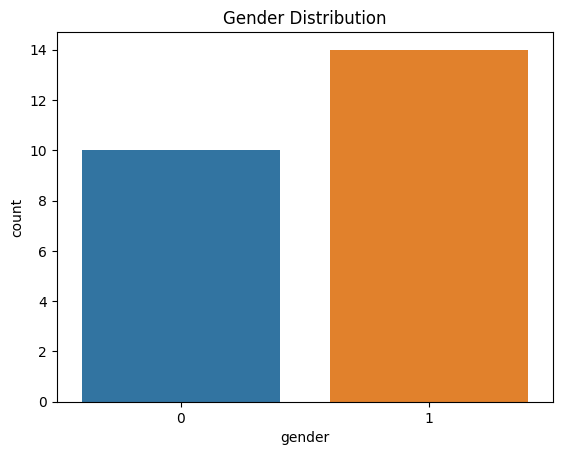

In [9]:
# Gender count plot
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

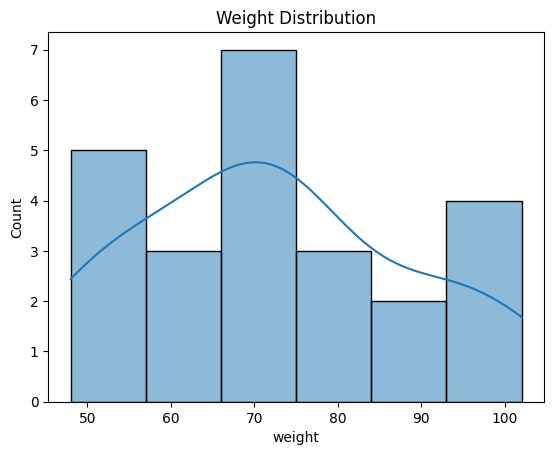

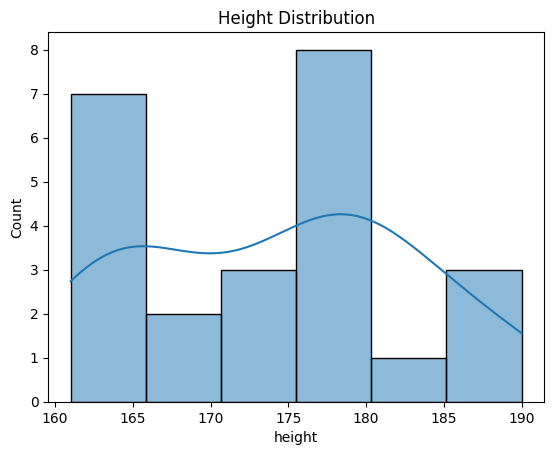

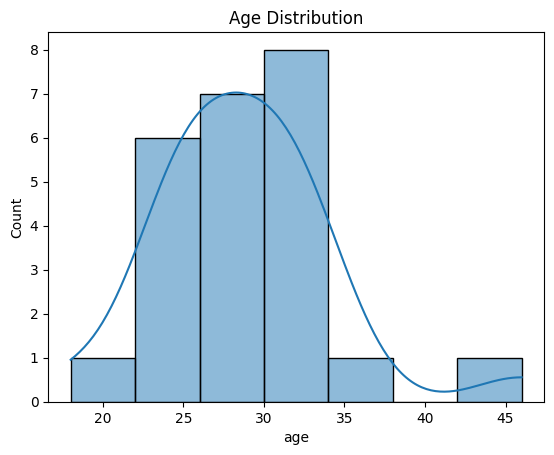

In [10]:
# Distribution of weight, height, and age
for col in ['weight', 'height', 'age']:
    sns.histplot(df[col], kde=True)
    plt.title(f'{col.capitalize()} Distribution')
    plt.show()

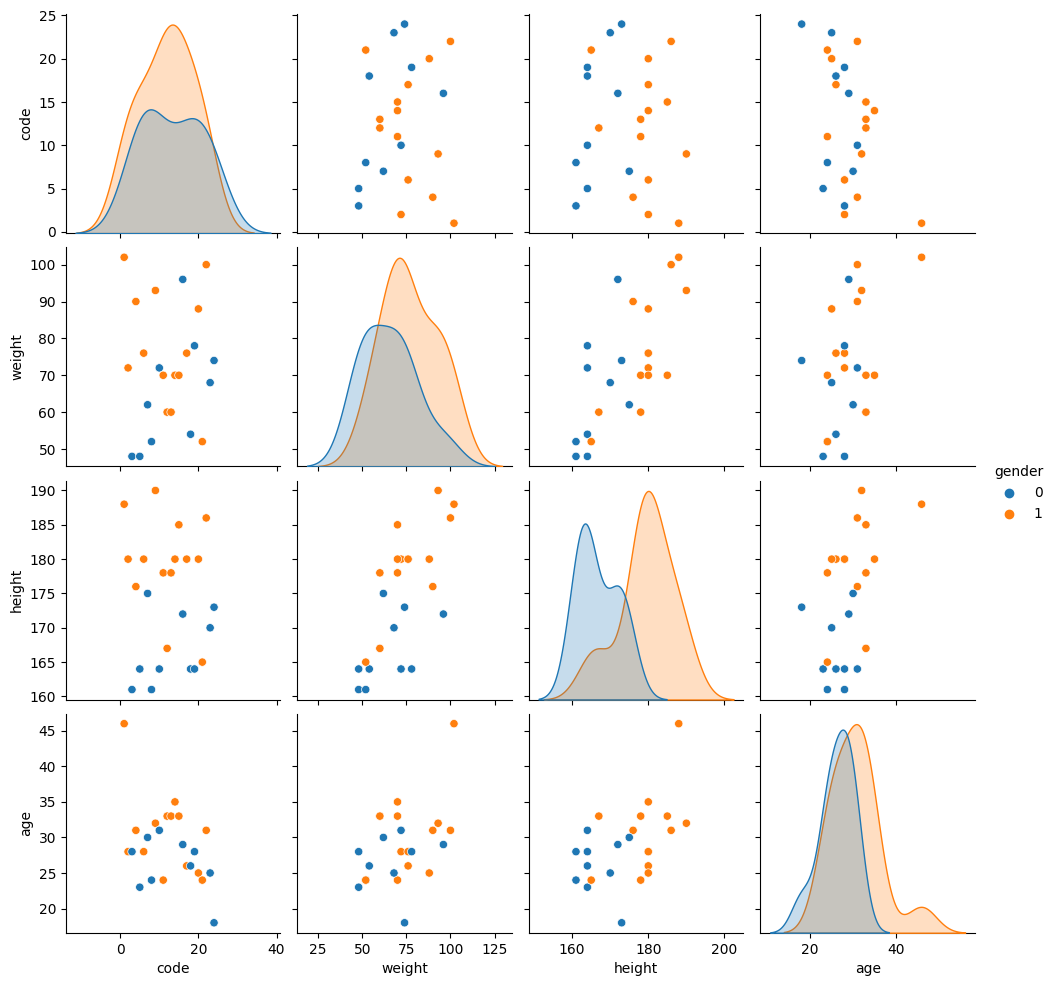

In [11]:
# Pairplot of numeric features
sns.pairplot(df, hue='gender')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop non-feature column
df = df.drop('code', axis=1)

# Encode gender: male=1, female=0
df['gender'] = LabelEncoder().fit_transform(df['gender'])

In [13]:
# Split features and label
X = df.drop('gender', axis=1)
y = df['gender']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [17]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['female', 'male']))

Classification Report:
              precision    recall  f1-score   support

      female       0.50      1.00      0.67         1
        male       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



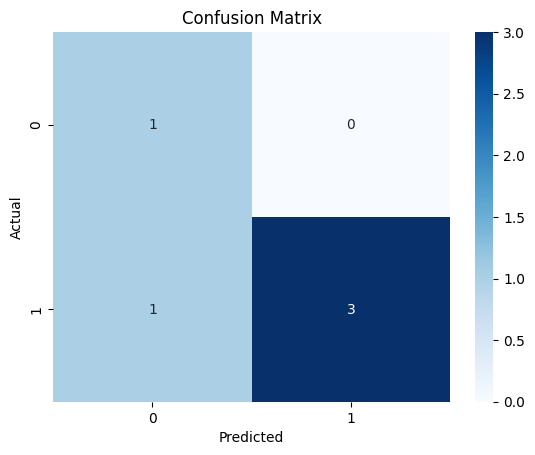

In [18]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()